In [1]:
import numpy as np
import pandas as pd
# import tensorflow as 

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [5]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
print(df.shape)

(10000, 11)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [8]:
df.duplicated().sum()

0

In [9]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [10]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [11]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [12]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [13]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [14]:
x = df.drop(columns=['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [15]:
x_train.shape,y_train.shape

((8000, 11), (8000,))

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [20]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [58]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim = 11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [59]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 11)                132       
                                                                 
 dense_13 (Dense)            (None, 11)                132       
                                                                 
 dense_14 (Dense)            (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [60]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])  #binary_crossentropy = log-loss

In [61]:
history = model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 2ms/step - loss: 0.5914 - accuracy: 0.7023 - val_loss: 0.4778 - val_accuracy: 0.8019
Epoch 2/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4489 - accuracy: 0.8105 - val_loss: 0.4311 - val_accuracy: 0.8169
Epoch 3/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4193 - accuracy: 0.8236 - val_loss: 0.4080 - val_accuracy: 0.8275
Epoch 4/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4009 - accuracy: 0.8327 - val_loss: 0.3921 - val_accuracy: 0.8363
Epoch 5/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3847 - accuracy: 0.8438 - val_loss: 0.3782 - val_accuracy: 0.8419
Epoch 6/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3721 - accuracy: 0.8512 - val_loss: 0.3676 - val_accuracy: 0.8475
Epoch 7/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3624 - accuracy: 0.8544 - val_loss: 0.3639 - val_accuracy: 0.8462

In [53]:
model.layers[0].get_weights()

[array([[-4.00228977e-01, -2.38020882e-01,  5.01753509e-01,
          2.92313039e-01, -3.40905696e-01, -1.27907947e-01,
          9.01178047e-02, -2.42056206e-01, -3.01547766e-01,
         -1.87144250e-01, -3.47010195e-01],
        [-3.63286063e-02,  8.50773513e-01,  7.79999375e-01,
          2.62435436e-01, -6.41841471e-01,  3.16207945e-01,
         -6.41355753e-01,  6.35826409e-01, -6.75766468e-01,
         -1.37395287e+00,  4.71370891e-02],
        [-6.02663517e-01,  1.25465602e-01,  1.80050269e-01,
         -2.20510826e-01, -1.14432327e-01,  7.86151350e-01,
         -2.76101828e-01,  9.94131416e-02,  2.35989675e-01,
          4.03336257e-01, -2.58467756e-02],
        [-5.45125961e-01, -1.26081467e-01,  1.27506450e-01,
         -6.49276376e-01, -1.42241076e-01, -9.95079651e-02,
         -6.73590079e-02, -3.25316787e-01,  1.81232765e-01,
          2.55577356e-01,  2.49528542e-01],
        [ 1.58279717e-01,  1.10483980e-02, -2.27539480e-01,
         -3.10575098e-01,  3.03391606e-01,  

In [54]:
model.layers[1].get_weights()

[array([[-0.04117156,  0.18478642, -0.06678529, -0.0271928 , -0.39375693,
          0.28720638, -0.2069284 ,  0.2880365 ,  0.6442111 ,  0.3271135 ,
          0.33438402],
        [-0.10247765,  0.84006333, -0.17289068, -0.9892443 ,  0.24222074,
          0.66982627, -0.46511215,  0.38930932, -0.47726923, -0.41586426,
         -0.7776231 ],
        [ 0.01738286,  0.45096648, -0.17860202,  0.60621655, -1.0110033 ,
         -0.36129907,  0.42773014, -0.3578131 , -0.22682309,  0.19742733,
         -0.03442089],
        [-0.597474  , -0.03622509,  0.21654457, -0.10999771, -1.2383758 ,
         -0.36533028,  0.35226667, -0.8734541 ,  0.0846457 , -0.4964195 ,
          0.09877308],
        [-0.34899622,  0.36797625,  0.3343829 , -0.42204332,  0.26450443,
          0.3778669 , -0.04536251, -0.35488954,  0.10279884, -0.73900044,
          0.5691473 ],
        [-0.5931561 ,  0.6965052 , -0.44187826,  0.07682966, -0.44846514,
         -0.27475515, -0.4620055 ,  0.13520238,  0.16625816,  0.3187169

In [55]:
y_log = model.predict(x_test_scaled)

63/63 [==============================] - 0s 805us/step


In [56]:
y_pred = np.where(y_log>0.5,1,0)

In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8615

In [62]:
import matplotlib.pyplot as plt

In [64]:
history.history

{'loss': [0.5914119482040405,
  0.44886744022369385,
  0.4193461537361145,
  0.4009498655796051,
  0.38468602299690247,
  0.3721051514148712,
  0.3623545169830322,
  0.3562556505203247,
  0.3516779839992523,
  0.3486383855342865,
  0.34651240706443787,
  0.34486907720565796,
  0.34300002455711365,
  0.3420841097831726,
  0.3405817747116089,
  0.3396255373954773,
  0.3387344479560852,
  0.338628888130188,
  0.3379284739494324,
  0.3371937870979309,
  0.3363012969493866,
  0.33541762828826904,
  0.33564087748527527,
  0.3353731632232666,
  0.33423754572868347,
  0.33418551087379456,
  0.33398672938346863,
  0.33388927578926086,
  0.3335772752761841,
  0.3333873748779297,
  0.33280444145202637,
  0.33218851685523987,
  0.3321569561958313,
  0.33215463161468506,
  0.3315645158290863,
  0.331734299659729,
  0.3312796354293823,
  0.3314005732536316,
  0.33082717657089233,
  0.3306736648082733,
  0.3304699957370758,
  0.3303465247154236,
  0.330147385597229,
  0.330735981464386,
  0.329809188

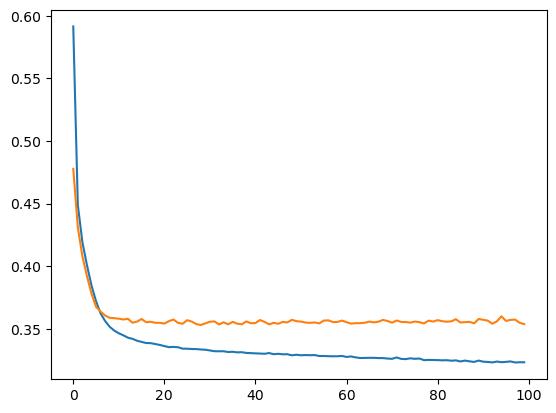

In [66]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

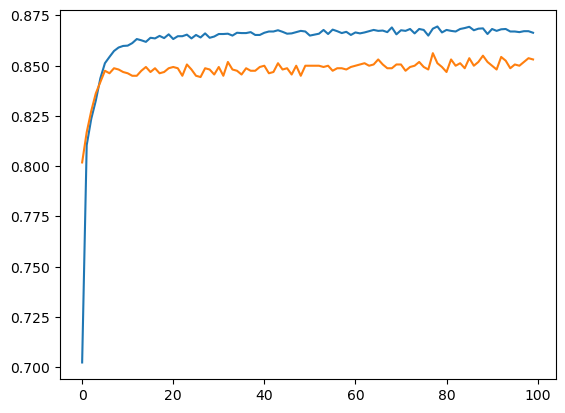

In [67]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])